# Выпускной проект. Телеком 📞: исследование оттока клиентов

-----------------------------------------------------------------



## Задача ⭐️
Построить прототип модели машинного обучения:
1. Составить план работы. Исходное условие задачи заведомо неполное и содержит лишнюю информацию и провести разведывательный анализ данных, чтобы понять, какие вопросы подготовить.
2. Уточнить задачу. Задать вопросы тимлиду, на вводном вебинаре.
3. Подготовить данные и разработать модели
4. Подготовить отчёт об успешности выполнения задания.

https://concrete-web-bad.notion.site/20b6db57bf464afe86232e26190285e5

### Кейс 👀

*Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.*

## Описание 🍀

Оператор предоставляет два основных типа услуг:

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

Данные состоят из файлов, полученных из разных источников:

- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

<b><font size=5>План работы</font></b><a name="to_content."></a>

- [<b>Предобработка данных</b>](#0.)
    * создание плана работ
    * импорт библиотек
    * чтение файлов с данными
    * изучение общей информаций по каждому датафрейму.
    * --------------- первая часть -------------------
 [<b>Перейти ко второй части задания</b>](#1.)   
    * добавление целевого признака Сhurn - отток клиентов *
    * обработка признаков BeginDate EndDate *
    * обработка пропусков, заполнение пропусков
    * обработка дубликатов --
    * изменение формата и типов данных
    * работа с аномалиями --
    * создание новых признаков (в начало перенес)
    * категоризация данных --
    * обьединение датафреймов
    * проверка данных после обьединения
    * заменим значения целевого признака на (0, 1) *
    * удаление бесполезных признаков для обучения *
    * разделение на выборки
    * кодирования (One-Hot Encoding, OHE) *
    * проведем масштабирование (стандартизацию данных) *
    * выводы по предобработке данных
  
- [<b>Обучить модель, подобрать гиперпараметры и протестировать</b>](#2.)
    * МО: гиперпараметры, метрика на кросс-валидации
    * выбрать модели для обучения
    * посмотреть на качество моделей по скорости оубчения модели и качеству на основе метрик roc auc
    * проверка качества модели на тестовой выборке
    * исследование важности признаков лучшей модели
    * --------------- вторая часть -------------------
[<b>Перейти к третьей части задания</b>](#3.)  
- [<b>Заключение (отчет)</b>](#3.)

    * Описать какие пункты плана были выполены, а какие нет (пояснитьпочему)
    * Описать какие трудности возникали и как я с ними справился
    * Описать ключевые итерации в решении задачи
    * Описать итоговую модель, какие у нее гиперпараметры и качество
    * Описать предобработки списока признаков, используемых для обучения лучшей модели
    * Написать Итоговое заключение и рекомендации
    * --------------- третья часть -------------------

<b><font size=5>Предобработка данных</font></b><a name="0."></a>

[<font size="2">(к содержанию)</font>](#to_content.)

- импорт библиотек.

In [ ]:
# теперь для OneHotEncoder работает одновремеено drop='first' и handle_unknown='ignore'
!pip install scikit-learn==1.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd # импорт библиотеки pandas - *
import numpy as np # импорт библиотеки nump - *
import matplotlib.pyplot as plt # импорт библиотеки matplotlib - *
import seaborn as sns # импорт библиотеки seaborn *
#import scipy.stats as stats # инструменты статистики и корреляционных функций
#from scipy.stats import chi2_contingency, chi2
from functools import reduce # кумулятивно применяет функцию, сводя её к единственному значению *
#from scipy.special import softmax # преобразует каждый элемент коллекции, вычисляя экспоненту *
import io

import warnings # Фильтр предупреждений определяет, будут ли предупреждения игнорироваться -
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings('ignore')

#Обучение и тестирование моделей
from sklearn.model_selection import train_test_split
#from sklearn.dummy import DummyClassifier
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LogisticRegression #
from catboost import CatBoostClassifier
from xgboost import XGBClassifier #
from lightgbm import LGBMClassifier #
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import roc_auc_score, auc, roc_curve, classification_report, confusion_matrix, accuracy_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, mean_squared_error
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)
#from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle # Перетасовка массивов или разреженных матриц согласованным образом *

# настройки интерфейса
sns.set_style('darkgrid') # настройка элементов графика, темная тема
sns.set_palette('muted') # устанавливает цветовую палитру в качестве текущей
plt.style.use('dark_background')
pd.set_option('display.max_columns', None) # смотреть все  столбцы
from time import time


- чтение файлов с данными и изучение общей информаций.

In [ ]:
try:
    contract = pd.read_csv('/datasets/contract_new.csv')
    personal = pd.read_csv('/datasets/personal_new.csv')
    internet = pd.read_csv('/datasets/internet_new.csv')
    phone = pd.read_csv('/datasets/phone_new.csv')
except:
    contract = pd.read_csv('contract_new.csv')
    personal = pd.read_csv('personal_new.csv')
    internet = pd.read_csv('internet_new.csv')
    phone = pd.read_csv('phone_new.csv')

In [ ]:
# именуем датафреймы
contract.name = 'contract' # информация о договоре
internet.name = 'internet' # информация об интернет-услугах
personal.name = 'personal' # персональные данные клиента
phone.name = 'phone'       # информация об услугах телефонии

# КОНСТАНТЫ:
RANDOM_STATE = 190623
TEST_SIZE = 0.25

In [ ]:
def get_data_info(data):
    display(data.sample(5))
    display(data.info())
    display(data.describe(include='all'))

In [ ]:
# Функция для консолидации информации
def info_df(df):
    print('Название датафрэйм :', df.name)
    print("Размер датафрейма : " ,df.shape)
    print('')
    print('---------Информация о датафрейме---------')
    print(df.info())
    print('')
    print ("\n Начальная статистика : \n" ,df.describe())
    print('---------Пропуски---------')
    count=0
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(element, '-', df[element].isna().sum(), 'пропусков')
            count=+1
    if count ==0:
        print('Пропусков нет')
    print('')
    print('---------Дубликаты---------')
    if df.duplicated().sum() > 0:

        print('Дубликатов', df.duplicated().sum())
    else:
        print('Дубликатов нет')
    print('')
    print('---------Уникальных обьектов---------')
    print (df.nunique())

In [ ]:
# информация о договоре
info_df(contract)
pd.set_option('display.max_columns', None) # смотреть все  столбцы
contract

Название датафрэйм : contract
Размер датафрейма :  (7043, 8)

---------Информация о датафрейме---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


 Начальная статистика : 
        MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000
---------Пропуски---------
Пропуско

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,2035.2
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7430.4
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,325.6
7041,8361-LTMKD,2019-07-01,No,Month-to-month,Yes,Mailed check,74.40,520.8


Инфо в первом приближени датафрейм `contract`
- **BeginDate** и **EndDate** будем менять формат Даты. **EndDate** если клиент ушел, стоит дата, если нет, то значение No(запомним как целевой признак, что можно сделать - данный признак перевести в (0, 1)
- Есть возможность по дате определить количество месяцев(дней) сотрудничества
- **TotalCharges** перевести в int

Расшифровка данных:

* `customerID` - уникальный ID клиента
* `BeginDate` - дата начала пользования услугами
* `EndDate` - дата окончания пользования услугами
* `Type` - Тип договора (ежемесячный,годовой и т.д.)
* `PaperlessBilling` - факт выставления счета на эл. почту
* `PaymentMethod` - способы оплаты
* `MonthlyCharges` - ежемесячные траты на услуги
* `TotalCharges` - всего потрачено денег
* `Dependents` - наличие иждевенцев
* MultipleLines - наличие возможности  ведения параллейных линий



In [ ]:
# информация об интернет-услугах
info_df(internet)
pd.set_option('display.max_columns', None) # смотреть все  столбцы
internet

Название датафрэйм : internet
Размер датафрейма :  (5517, 8)

---------Информация о датафрейме---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


 Начальная статистика : 
         customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     7590-VHVEG     Fiber optic             No        

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


Инфо в первом приближени датафрейм `internet`

- Данные по 5517 из 7043клиентам, данный датафрейм отображает только пользователей интернет
- Пропусков нет
- Признаки перевести в (0, 1)

Расшифровка данных:
* `customerID` - уникальный ID клиента
* `InternetService` - варианты подключения интернет-соединения
* `OnlineSecurity` - Услуга блокировки небезопасных сайтов
* `OnlineBackup` - Услуга Облачного хранилища файлов
* `DeviceProtection` - Наличие услуги антивируса
* `TechSupport` - Услуга Выделенной линии технической поддержки
* `StreamingTV` - Услуга стримингового телевидения
* `StreamingMovies` - Услуга каталога фильмов


In [ ]:
# персональные данные клиента
info_df(personal)
pd.set_option('display.max_columns', None) # смотреть все  столбцы
personal

Название датафрэйм : personal
Размер датафрейма :  (7043, 5)

---------Информация о датафрейме---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


 Начальная статистика : 
        SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
---------Пропуски---------
Пропусков нет

---------Дубликаты---------
Дубликатов нет

---------Уникальных обьектов---------
customerID       7043
gender              2
SeniorCitizen       2
Partner             2
Dep

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


Инфо в первом приближени датафрейм `personal`

- пропусков нет
- Признаки перевести в (0, 1)

Расшифровка данных:
* `customerID` - уникальный ID клиента
* `gender` - пол клиента
* `Partner` - пожилой человек или нет
* `Dependents` - работящий или нет


In [ ]:
# информация об услугах телефонии
info_df(phone)
pd.set_option('display.max_columns', None) # смотреть все  столбцы
phone

Название датафрэйм : phone
Размер датафрейма :  (6361, 2)

---------Информация о датафрейме---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


 Начальная статистика : 
         customerID MultipleLines
count         6361          6361
unique        6361             2
top     5575-GNVDE            No
freq             1          3390
---------Пропуски---------
Пропусков нет

---------Дубликаты---------
Дубликатов нет

---------Уникальных обьектов---------
customerID       6361
MultipleLines       2
dtype: int64


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


Инфо в первом приближени датафрейм phone

- Признаки перевести в (0, 1)

Расшифровка данных:

* `customerID` - уникальный ID клиента
* `MultipleLines` - Мультиканальная линия или нет (в данном случае отдельно услуга телефона связи или вместе с интернетом)


<b><font size=10>2</font></b><a name="1."></a>

[<font size="2">(к содержанию)</font>](#to_content.)

* добавление целевого признака Сhurn - отток клиентов

In [ ]:
# Реализуем проверку EndDate если есть дата, значит клиент ушел (Yes)
contract['Churn'] = contract['EndDate'].apply(lambda x: x if x == 'No' else 'Yes')

* обработка признаков BeginDate EndDate (даты)

In [ ]:
# Реализуем проверку EndDate если есть дата 01-02-2020 (окончание данных), значит клиент не ушел, т.е. продолжает пользоваться услугами значение будет(No)
contract['EndDate'] = contract['EndDate'].apply(lambda x: '2020-02-01' if x == 'No' else x)

# Доработаем формат даты (date_convert)
def date_convert(df, column):
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')

date_convert(contract, 'BeginDate')
date_convert(contract, 'EndDate')

# Найдем разницу (новый признак duration_in_days) в днях между BeginDate и EndDate (с изменением типа в признаках) :
contract['duration_in_days'] = (contract['EndDate'] - contract['BeginDate']).astype('timedelta64[D]')
contract['duration_in_days'] = contract['duration_in_days'].astype('int')

# Изменим порядок признаков, для наглядности дата фрейма и сохраним его с новым именем (страхуюсь)
columns_sort = contract.columns.tolist()
columns_sort = columns_sort[:-2] + columns_sort[-1:] + [columns_sort[-2]]

contract_sort = contract[columns_sort]
contract_sort


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,duration_in_days,Churn
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,31,No
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,1036,No
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,123,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.6,1371,No
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.5,153,No
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,2035.2,730,No
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7430.4,2191,No
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,325.6,337,No
7041,8361-LTMKD,2019-07-01,2020-02-01,Month-to-month,Yes,Mailed check,74.40,520.8,215,No


* обработка пропусков, заполнение пропусков, изменение типов данных

In [ ]:
# Изменим тип TotalCharges и посмотрим на информацию о датафрейме
contract_sort['TotalCharges'] = pd.to_numeric(contract_sort['TotalCharges'], errors='coerce')
contract_sort.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   duration_in_days  7043 non-null   int64         
 9   Churn             7043 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 550.4+ KB


In [ ]:
# Заполним пропуски(7043 - 7032 = 11 ) в TotalCharges (общая сумма) на значения MonthlyCharges (ежемесячные платежи), т.к. эти пропуски это новые клиенты без истории платежей
# создадим фильтр fil

contract_sort['TotalCharges'] = np.where(contract_sort['TotalCharges'] > 0, \
                                       contract_sort['TotalCharges'], contract_sort['MonthlyCharges'])

contract_sort.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   duration_in_days  7043 non-null   int64         
 9   Churn             7043 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 550.4+ KB


* обьединение датафреймов

In [ ]:
# Соединение все датафрэймы в одном
df = reduce(lambda left,right: pd.merge(left, right, on='customerID', how='left'), [contract_sort, personal, internet, phone])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   duration_in_days  7043 non-null   int64         
 9   Churn             7043 non-null   object        
 10  gender            7043 non-null   object        
 11  SeniorCitizen     7043 non-null   int64         
 12  Partner           7043 non-null   object        
 13  Dependents        7043 non-null   object        
 14  InternetService   5517 n

- Заменим значения целевого признака на (0, 1)

In [ ]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

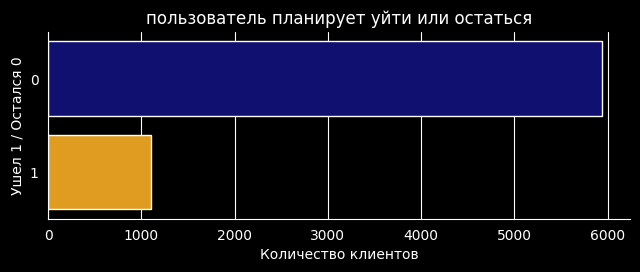

In [ ]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h', palette=['navy', 'orange'])
plt.title('пользователь планирует уйти или остаться')
plt.xlabel('Количество клиентов')
plt.ylabel('Ушел 1 / Остался 0');

In [ ]:
df['Churn'].value_counts()

0    5942
1    1101
Name: Churn, dtype: int64

Вывод:

Отношение ушедших к оставшимся - большое, то есть присутствует дисбаланс классов, но я буду работать с моделями которые умеют справляться с дисбалансом, и все же учту на этапе обучения

- удаление бесполезных признаков для обучения ['customerID', 'BeginDate', 'EndDate']

In [ ]:
df = df.drop(['customerID', 'BeginDate', 'EndDate'], axis=1)

* разделение на выборки *(пользуюсь информацией из консультации на вибенаре, сказано: чтобы избежать утечку информации, сначала делим , а потом кодируем)*

In [ ]:
# Разделим датафрейм на 2 части: обучающую и тестовую выбороки
features = df.drop(['Churn'], axis=1)
target = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

print('X_train: ', X_train.shape, 'X_test: ', X_test.shape)
print('y_train: ', y_train.shape, 'y_test: ', y_test.shape)

X_train:  (5282, 18) X_test:  (1761, 18)
y_train:  (5282,) y_test:  (1761,)


- кодироване (One-Hot Encoding, OHE) для преобразования категориальных признаков в численные (хотя многие модели сами умеют кодировать)

In [ ]:
# df_train = pd.get_dummies(df_train, drop_first=True)
# print('df_train: ', df_train.shape)
# df_test = pd.get_dummies(df_test, drop_first=True)
# print('df_test: ',  df_test.shape)

In [ ]:
get_data_info(X_train)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,duration_in_days,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
1484,Two year,Yes,Electronic check,99.20,7184.06,2163,Female,1,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,No
1095,Month-to-month,Yes,Electronic check,80.55,80.55,31,Male,0,No,No,Fiber optic,No,No,No,No,Yes,No,No
1946,Month-to-month,Yes,Credit card (automatic),90.40,4972.00,1676,Male,0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Yes
1044,One year,No,Bank transfer (automatic),54.25,434.00,245,Female,0,No,No,DSL,Yes,No,No,Yes,No,No,No
2441,Month-to-month,No,Mailed check,81.50,163.00,62,Female,1,No,No,Fiber optic,No,No,No,No,Yes,No,No


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 2298 to 6941
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              5282 non-null   object 
 1   PaperlessBilling  5282 non-null   object 
 2   PaymentMethod     5282 non-null   object 
 3   MonthlyCharges    5282 non-null   float64
 4   TotalCharges      5282 non-null   float64
 5   duration_in_days  5282 non-null   int64  
 6   gender            5282 non-null   object 
 7   SeniorCitizen     5282 non-null   int64  
 8   Partner           5282 non-null   object 
 9   Dependents        5282 non-null   object 
 10  InternetService   4096 non-null   object 
 11  OnlineSecurity    4096 non-null   object 
 12  OnlineBackup      4096 non-null   object 
 13  DeviceProtection  4096 non-null   object 
 14  TechSupport       4096 non-null   object 
 15  StreamingTV       4096 non-null   object 
 16  StreamingMovies   4096 non-null   objec

None

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,duration_in_days,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
count,5282,5282,5282,5282.000000,5282.000000,5282.000000,5282,5282.000000,5282,5282,4096,4096,4096,4096,4096,4096,4096,4772
unique,3,2,4,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2,2,2,2,2
top,Month-to-month,Yes,Electronic check,NaN,NaN,NaN,Male,NaN,No,No,Fiber optic,No,No,No,No,No,No,No
freq,2898,3115,1773,NaN,NaN,NaN,2680,NaN,2735,3719,2264,2589,2280,2316,2563,2106,2075,2536
mean,NaN,NaN,NaN,64.121090,2093.565309,896.232866,NaN,0.161871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,30.139891,2102.274205,683.453076,NaN,0.368367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,18.250000,19.050000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,34.050000,427.692500,276.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,70.025000,1318.770000,761.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,89.550000,3191.812500,1461.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
get_data_info(X_test)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,duration_in_days,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
5053,Month-to-month,Yes,Credit card (automatic),79.95,1317.58,488,Female,0,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Yes
4948,Month-to-month,No,Credit card (automatic),55.50,230.88,123,Female,0,No,No,DSL,No,No,No,No,Yes,No,No
5574,Month-to-month,No,Electronic check,20.45,838.45,1248,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3311,Month-to-month,Yes,Electronic check,44.80,2150.40,1461,Female,0,No,No,DSL,Yes,Yes,No,No,Yes,No,NaN
464,Two year,Yes,Bank transfer (automatic),116.05,8355.60,2191,Male,1,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 4440 to 5336
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              1761 non-null   object 
 1   PaperlessBilling  1761 non-null   object 
 2   PaymentMethod     1761 non-null   object 
 3   MonthlyCharges    1761 non-null   float64
 4   TotalCharges      1761 non-null   float64
 5   duration_in_days  1761 non-null   int64  
 6   gender            1761 non-null   object 
 7   SeniorCitizen     1761 non-null   int64  
 8   Partner           1761 non-null   object 
 9   Dependents        1761 non-null   object 
 10  InternetService   1421 non-null   object 
 11  OnlineSecurity    1421 non-null   object 
 12  OnlineBackup      1421 non-null   object 
 13  DeviceProtection  1421 non-null   object 
 14  TechSupport       1421 non-null   object 
 15  StreamingTV       1421 non-null   object 
 16  StreamingMovies   1421 non-null   objec

None

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,duration_in_days,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
count,1761,1761,1761,1761.000000,1761.000000,1761.000000,1761,1761.000000,1761,1761,1421,1421,1421,1421,1421,1421,1421,1589
unique,3,2,4,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2,2,2,2,2
top,Month-to-month,Yes,Electronic check,NaN,NaN,NaN,Female,NaN,No,No,Fiber optic,No,No,No,No,Yes,Yes,No
freq,977,1056,592,NaN,NaN,NaN,886,NaN,906,1214,832,909,808,779,910,717,711,854
mean,NaN,NaN,NaN,66.683135,2180.801982,905.522998,NaN,0.162976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,29.866233,2142.855030,682.308574,NaN,0.369448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,18.800000,19.100000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,44.300000,472.390000,276.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,72.750000,1408.110000,761.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,90.800000,3351.970000,1432.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#категориальные признаки для
cat_columns = X_train.select_dtypes(include='object').columns.to_list()
print(cat_columns)

['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']


In [ ]:
#численные признаки
num_features = X_train.select_dtypes(exclude='object').columns.to_list()
num_features

['MonthlyCharges', 'TotalCharges', 'duration_in_days', 'SeniorCitizen']

- Порядковое кодирование (Ordinal Encoding) позволяет закодировать категории цифрами, с помощью номера категории подходит для всех моделей кроме линейной

In [ ]:
ordinal_features_train = X_train.copy()
ordinal_features_test = X_test.copy()

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train[cat_columns] = encoder.fit_transform(X_train[cat_columns])
X_test[cat_columns]  = encoder.transform(X_test[cat_columns])

In [ ]:
# получилось одинаковое количество признаков
X_train.shape, X_test.shape

((5282, 18), (1761, 18))

In [ ]:
# получились одинаковые признаки в тренировочной и тестовой выборках
(X_train.columns != X_test.columns).sum()

0

- проведем масштабирование (стандартизацию данных) - передумал брать лин модель, а соответственно и проводить масштабирование

In [ ]:
# Отношение  ушедших к оставшимся до деления на выборки и признаки было  5942 / 1101 = 5,39 (см. выше)
relation_after = round((len(y_train[y_train == 0]) / len(y_train[y_train == 1])), 2)
relation_after
# стало см. ниже:

5.35

--------------------------------------------

### Выводы по предобработке данных

1  - Завершил предобработку данных                  
2  - Дисбаланс был 5,39 стал 1,74                          
3  - Категориальеные признаки перевел в численные через **One-Hot Encoding**, количественные нормировал через **StandardScaler**  
4  - Данные готовы к обучения. УРА

<b><font size=5>Обучить модель, подобрать гиперпараметры и протестировать</font></b><a name="2."></a>

[<font size="2">(к содержанию)</font>](#to_content.)

Вот что я выбрал:
`CatBoost` , `XGBClassifier`, `LGBMClassifier`  


ПЛАН подбора гиперпараметров и оценки качества работы модели:

- использовать **GridSearchCV**
- для кросс-валидации при подборе гиперпараметров **ShuffleSplit** с разбиением на 3 фолда
- Напишем функцию `model_learning` - обучает и возвращает лучшую модель на обучениии
- Напишем функцию `test_scoring` - для оценки качества модели
- Напишем функцию `feature_importance` - для оценки важности признаков
- Строим ROC-AUC кривую

In [ ]:
def model_learning(model, parameters):
    cv = ShuffleSplit(n_splits=3, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    grid_model = GridSearchCV(model, parameters, scoring='roc_auc', cv=cv)
    grid_model.fit(X_train, y_train)
    print('Лучшая оценка на валидации: ', grid_model.best_score_)
    print('Лучшие гиперпараметры модели на валидации: ', grid_model.best_params_)
    print('Лучшая модель: ', grid_model.best_estimator_)
    print('--------------------------------------')
    prediction=grid_model.predict(X_train)
    print('Accuracy train: ',accuracy_score(prediction,y_train))
    print('AUC-ROC train: ', roc_auc_score(y_train, prediction))
    print("Confusion Metrix:\n",confusion_matrix(prediction,y_train))
    return grid_model.best_estimator_

In [ ]:
def test_scoring(model):
    pred_proba_test = model.predict_proba(X_test)[:, 1]
    pred_test = model.predict(X_test)
    #print('Accuracy: ', round(model.score(X_test, y_test), 3))
    #print('Presicion: ', round(precision_score(y_test, pred_test), 3))
    #print('Recall: ', round(recall_score(y_test, pred_test), 3))
    print('AUC-ROC test: ', round(roc_auc_score(y_test, pred_proba_test), 3))
    print('--------------------------------------')
    print('')

    fpr, tpr, thresholds = roc_curve(y_test, pred_proba_test)

    sns.set()
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr)

    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('ROC-кривая')
    plt.show()

In [ ]:
def feature_importance(model):
    feats = {}
    for feature, importance in zip(X_train.columns, model.feature_importances_):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
    importances = importances.sort_values(by='Gini-Importance', ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={'index': 'Features'})
    sns.set(font_scale = 5)
    sns.set(color_codes=True, font_scale = 1.7)
    fig, ax = plt.subplots()
    fig.set_size_inches(30,15)
    sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='green')
    plt.xlabel('Важность', fontsize=25, weight = 'bold')
    plt.ylabel('Признаки', fontsize=25, weight = 'bold')
    plt.title('Важность признаков', fontsize=25, weight = 'bold')
    display(plt.show())
    display(importances)

#### ---------- CatBoost------------------------------------------------------------
Подбор параметров:
- n_estimators - количество решающих деревьев
- learning_rate - коэффициент шага антиградиента  
- max_depth - глубина дерева
- l2_leaf_reg - коеффициент при l2 регуризации  


In [ ]:
%%time
CatBoost_clf = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)
CatBoost_clf_param = {'n_estimators': [300, 500, 1000],
                      'learning_rate': [0.01, 0.1, 1],
                      'max_depth': [1, 5, 9],
                      'l2_leaf_reg': [1, 3]}

CatBoost_fitted = model_learning(CatBoost_clf, CatBoost_clf_param)

Лучшая оценка на валидации:  0.9136443863699985
Лучшие гиперпараметры модели на валидации:  {'l2_leaf_reg': 3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}
Лучшая модель:  <catboost.core.CatBoostClassifier object at 0x7f130a7ba3b0>
--------------------------------------
Accuracy train:  0.9854221885649376
AUC-ROC train:  0.9542145635263612
Confusion Metrix:
 [[4449   76]
 [   1  756]]
CPU times: user 9min 55s, sys: 1min 3s, total: 10min 58s
Wall time: 7min 6s


Выведем важные признаки модели:

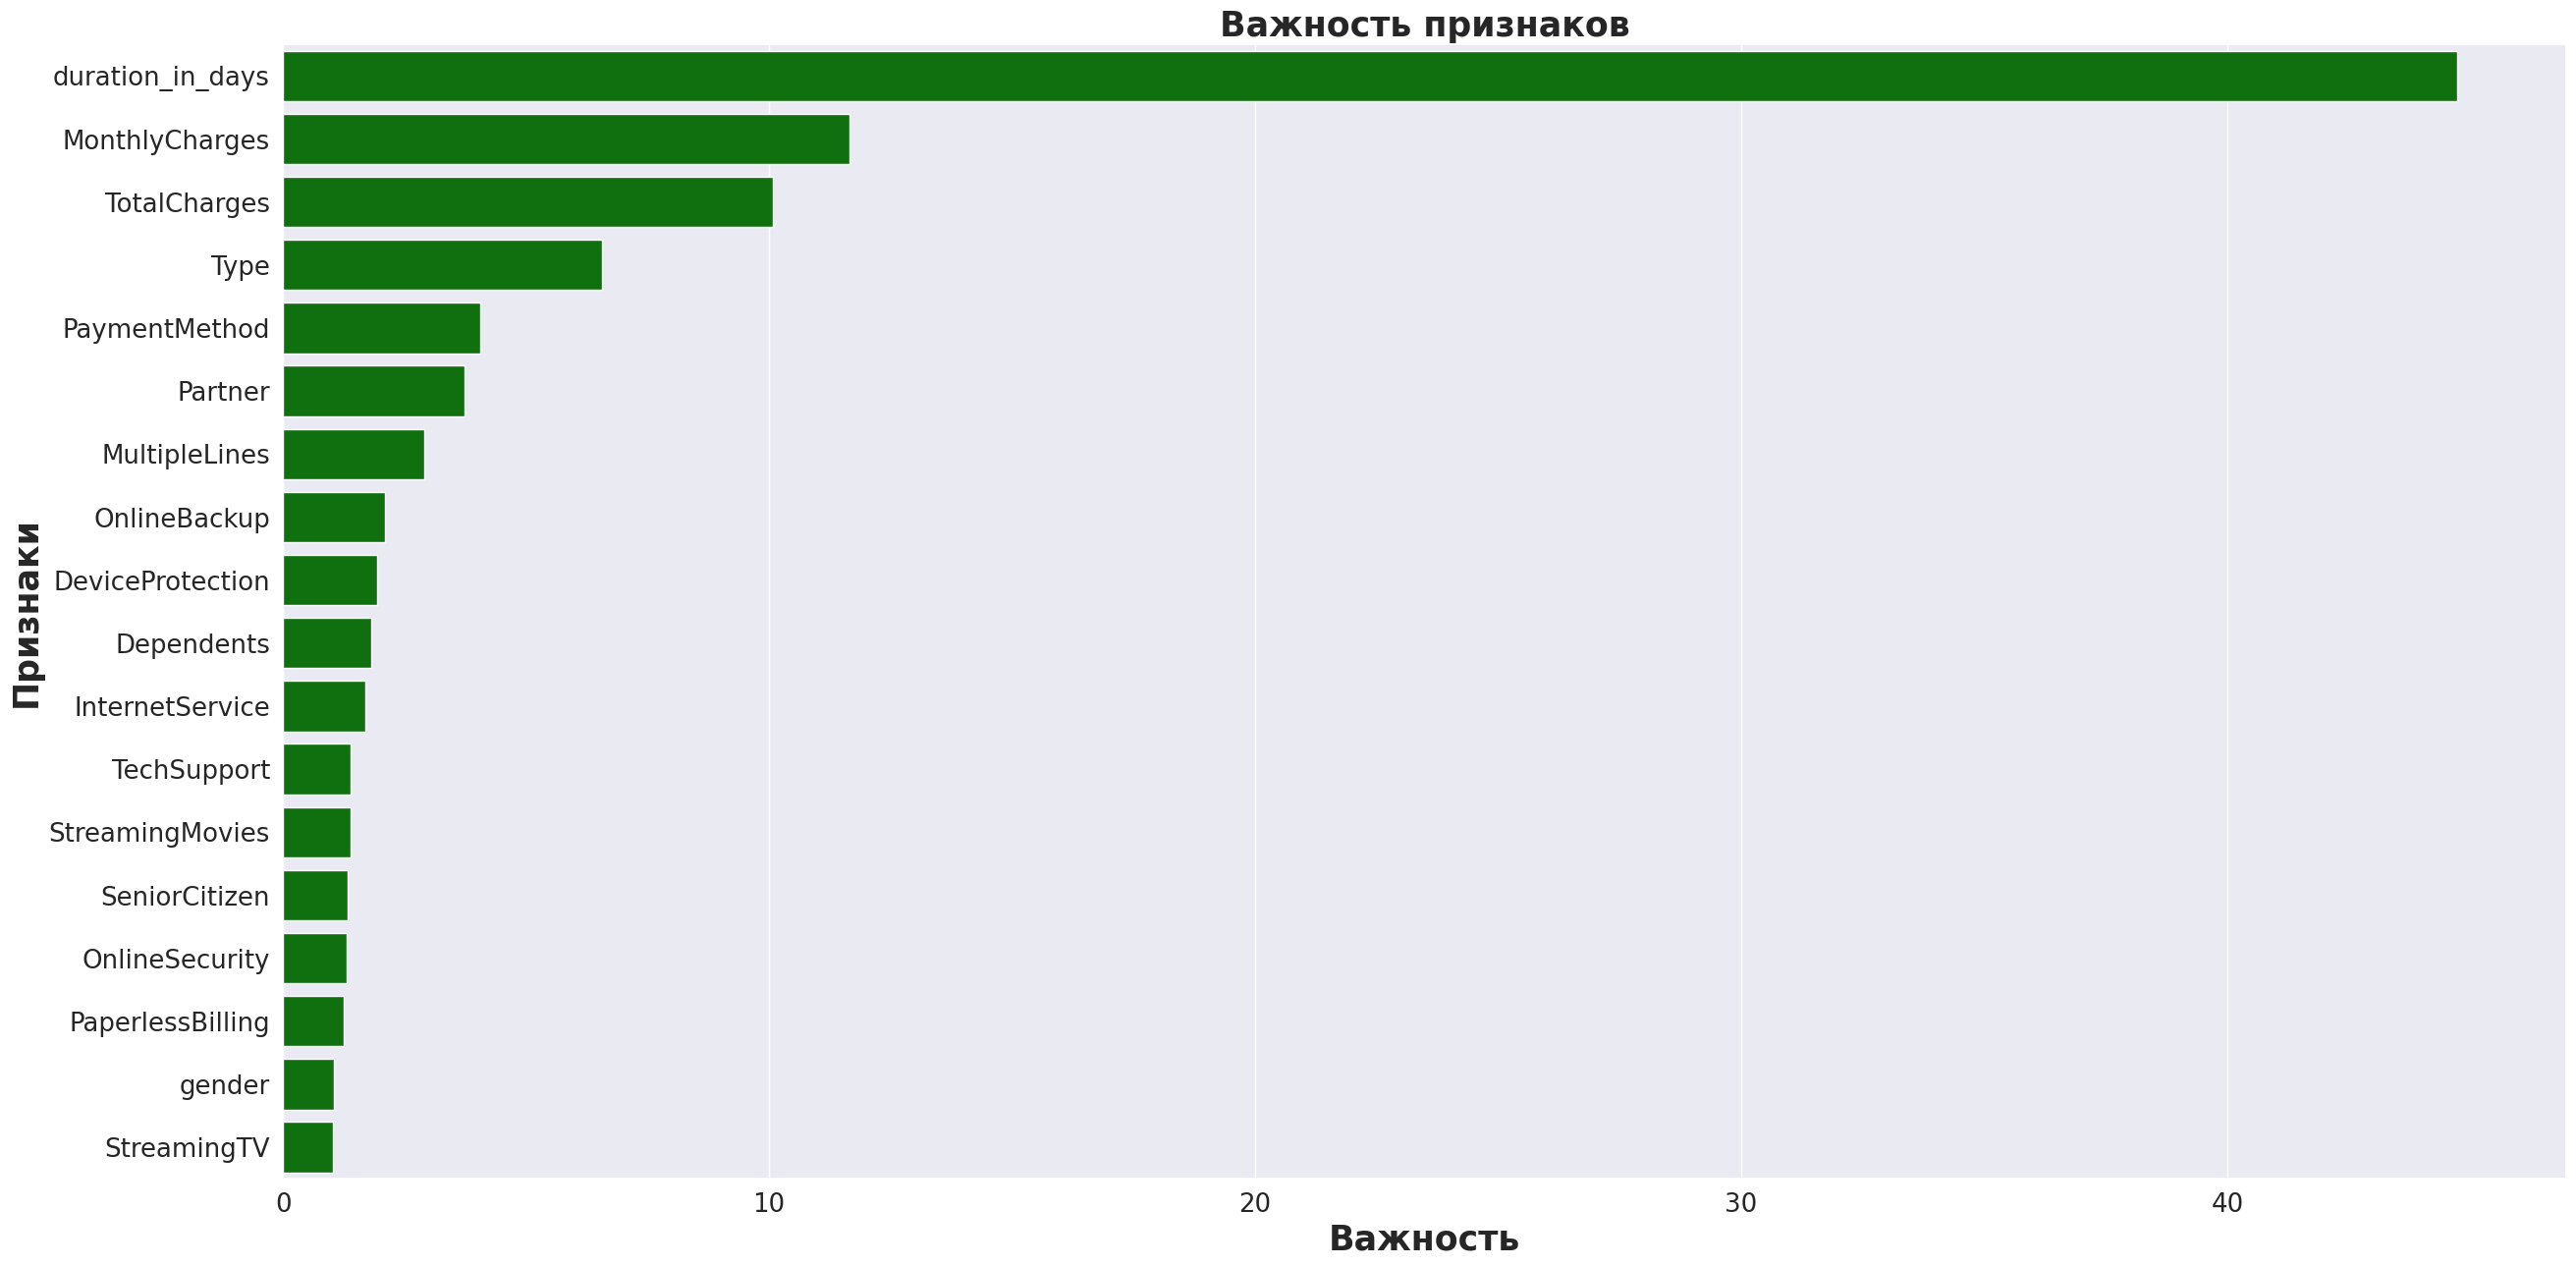

None

,Features,Gini-Importance
0,duration_in_days,44.739518
1,MonthlyCharges,11.648279
2,TotalCharges,10.084899
3,Type,6.554193
4,PaymentMethod,4.050642
5,Partner,3.731107
6,MultipleLines,2.897213
7,OnlineBackup,2.105198
8,DeviceProtection,1.946721
9,Dependents,1.810911


In [ ]:
feature_importance(CatBoost_fitted)

#### -------------- XGBoost ---------------------------------------------    
Подбор параметров:
- n_estimators - количество решающих деревьев
- learning_rate - коэффициент шага антиградиента  
- max_depth - глубина дерева
- l2_leaf_reg - коеффициент при l2 регуризации  

Обучим модель и оценим на тестовой выборке:

In [ ]:
%%time
xgb_clf = XGBClassifier(random_state=RANDOM_STATE, n_jobs=-1)
xgb_clf_param = {'n_estimators': [300, 500, 1000],
                  'learning_rate': [0.01, 0.1, 1],
                  'max_depth': [1, 5, 9],
                  'l2_leaf_reg': [1, 3]}

xgb_clf_fitted = model_learning(xgb_clf, xgb_clf_param)
#test_scoring(xgb_clf_fitted)


[04:59:14] WARNING: ../src/learner.cc:767: 
Parameters: { "l2_leaf_reg" } are not used.

[04:59:15] WARNING: ../src/learner.cc:767: 
Parameters: { "l2_leaf_reg" } are not used.

[04:59:15] WARNING: ../src/learner.cc:767: 
Parameters: { "l2_leaf_reg" } are not used.

[04:59:15] WARNING: ../src/learner.cc:767: 
Parameters: { "l2_leaf_reg" } are not used.

[04:59:16] WARNING: ../src/learner.cc:767: 
Parameters: { "l2_leaf_reg" } are not used.

[04:59:19] WARNING: ../src/learner.cc:767: 
Parameters: { "l2_leaf_reg" } are not used.

[04:59:20] WARNING: ../src/learner.cc:767: 
Parameters: { "l2_leaf_reg" } are not used.

[04:59:21] WARNING: ../src/learner.cc:767: 
Parameters: { "l2_leaf_reg" } are not used.

[04:59:22] WARNING: ../src/learner.cc:767: 
Parameters: { "l2_leaf_reg" } are not used.

[04:59:23] WARNING: ../src/learner.cc:767: 
Parameters: { "l2_leaf_reg" } are not used.

[04:59:25] WARNING: ../src/learner.cc:767: 
Parameters: { "l2_leaf_reg" } are not used.

[04:59:26] WARNING: .

Выведем важные признаки модели:

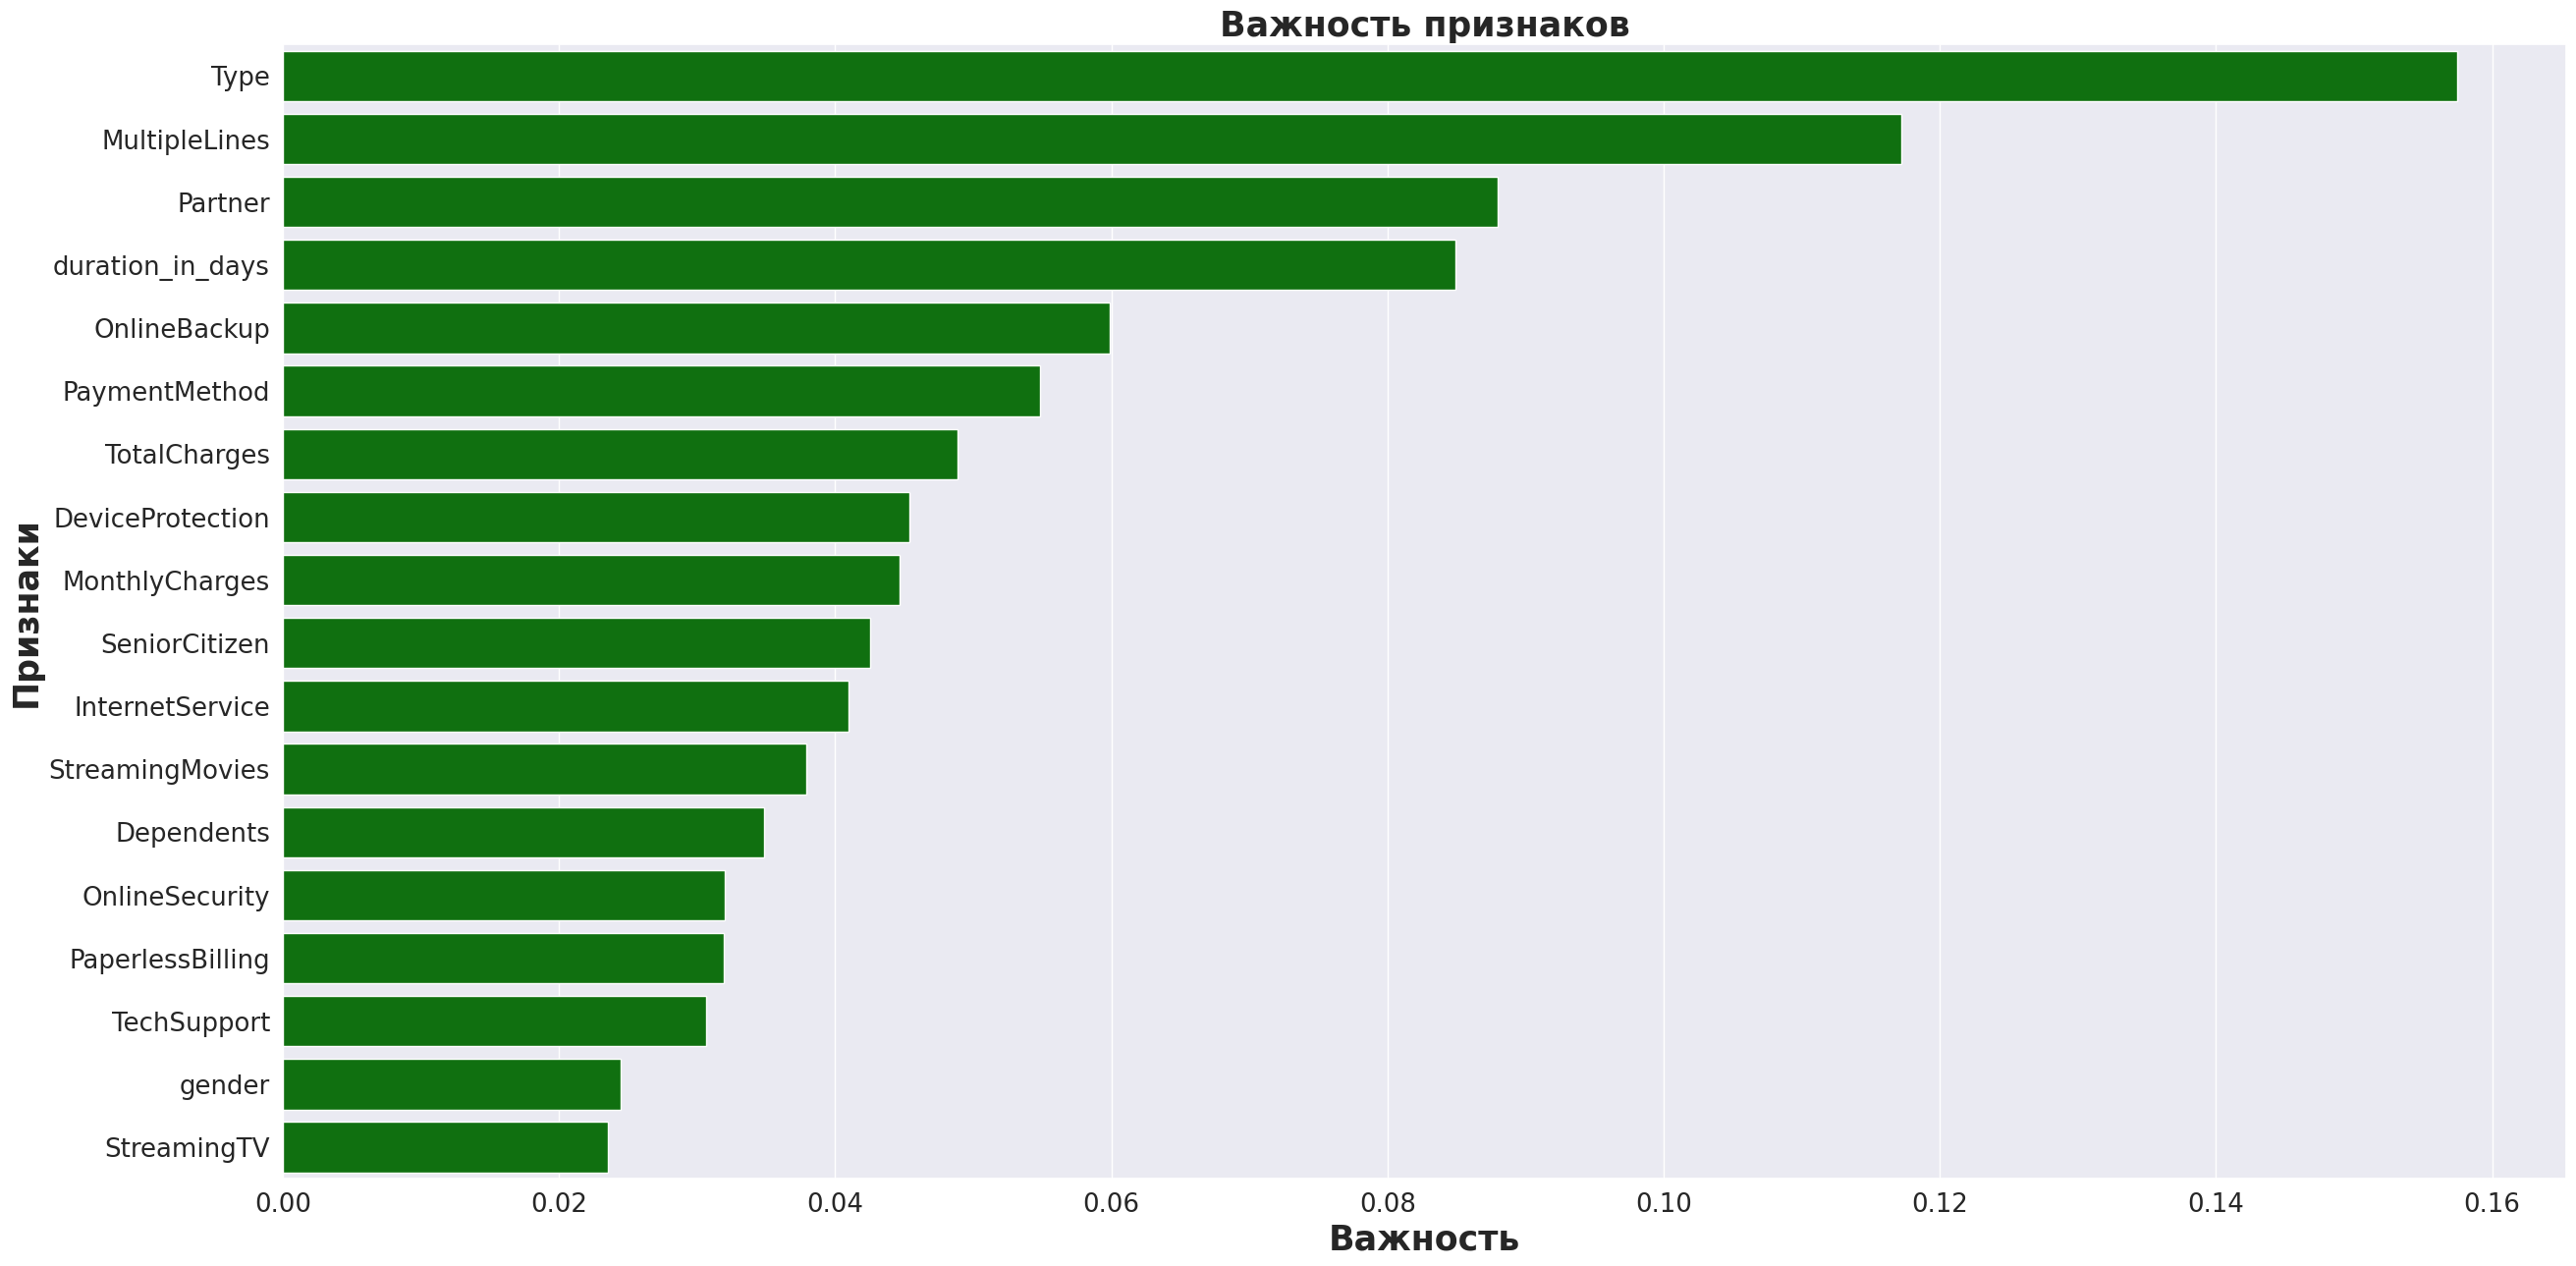

None

,Features,Gini-Importance
0,Type,0.157503
1,MultipleLines,0.117202
2,Partner,0.087993
3,duration_in_days,0.084895
4,OnlineBackup,0.059909
5,PaymentMethod,0.054828
6,TotalCharges,0.048844
7,DeviceProtection,0.045375
8,MonthlyCharges,0.044634
9,SeniorCitizen,0.042554


In [ ]:
feature_importance(xgb_clf_fitted)

#### -------------------- LGBM ----------------------------    
Подбор параметров:
- n_estimators - количество решающих деревьев
- learning_rate - коэффициент шага антиградиента  
- max_depth - глубина дерева
- l2_leaf_reg - коеффициент при l2 регуризации  



In [ ]:
%%time
lgbm_clf = LGBMClassifier(n_jobs=-1, random_state=RANDOM_STATE)
lgbm_clf_param = {'n_estimators': [300, 500, 1000],
                  'learning_rate': [0.01, 0.1, 1],
                  'max_depth': [1, 5, 9],
                  'l2_leaf_reg': [1, 3]}

lgbm_clf_fitted = model_learning(lgbm_clf, lgbm_clf_param)
#test_scoring(lgbm_clf_fitted)

[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [

Выведем важные признаки модели:

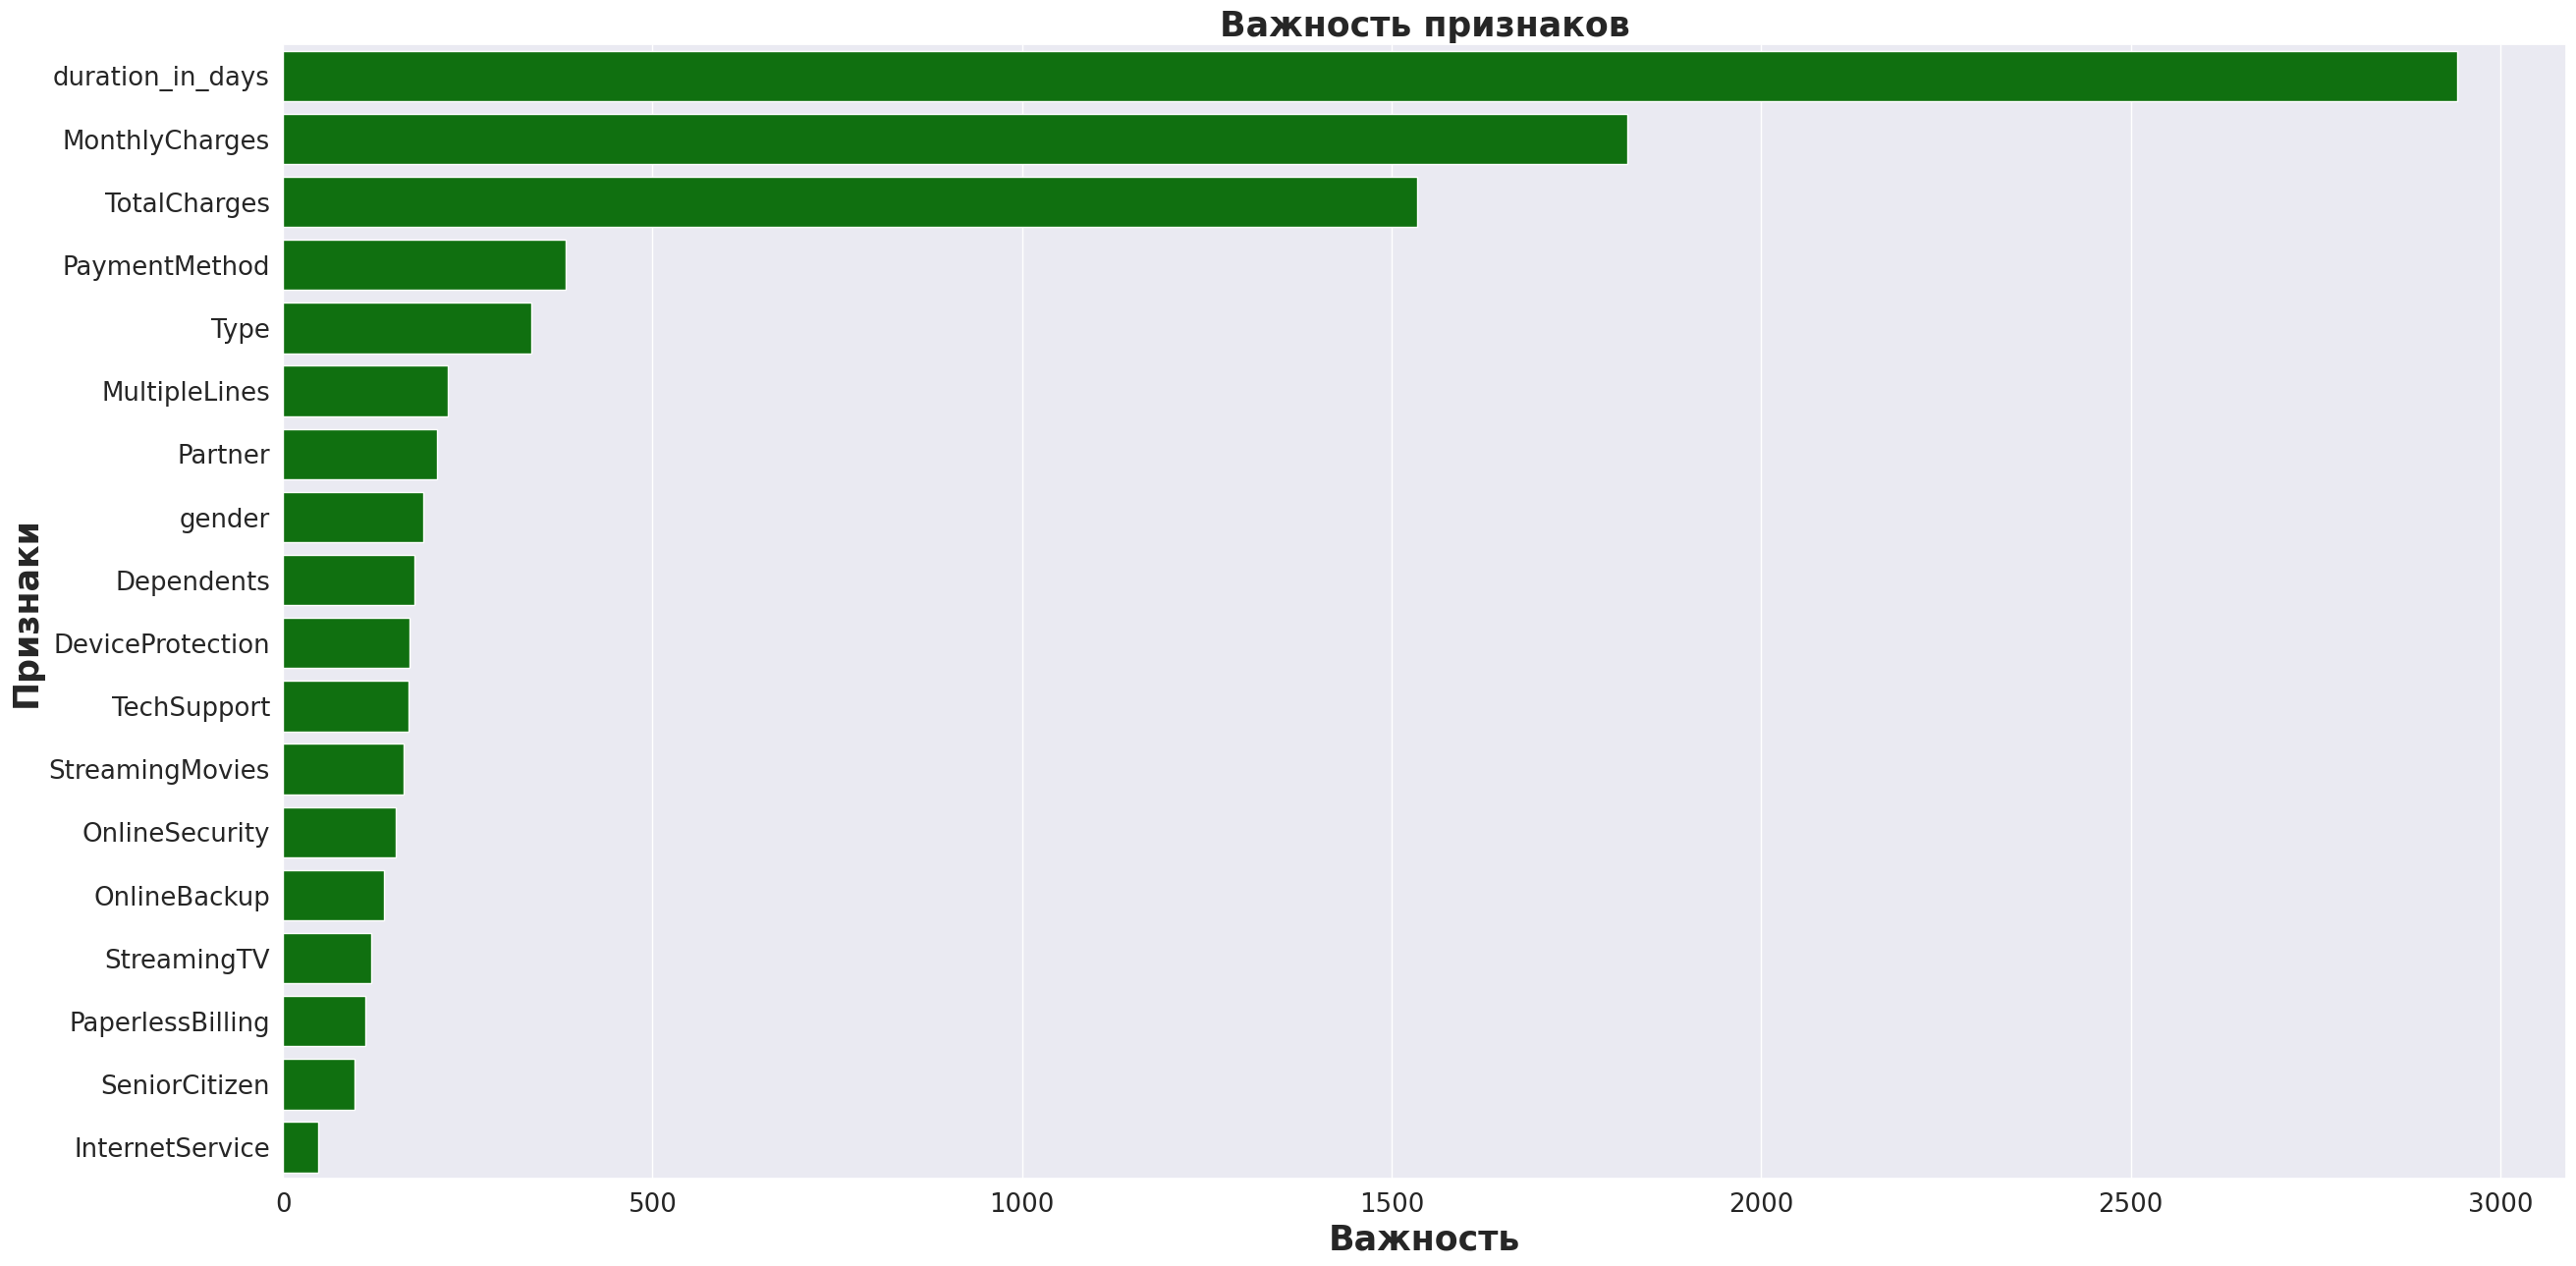

None

,Features,Gini-Importance
0,duration_in_days,2942
1,MonthlyCharges,1819
2,TotalCharges,1535
3,PaymentMethod,383
4,Type,336
5,MultipleLines,223
6,Partner,209
7,gender,190
8,Dependents,178
9,DeviceProtection,171


In [ ]:
feature_importance(lgbm_clf_fitted)

ПОСТРОИМ СВОДНУЮ ТАБЛИЦУ (для наглядности)

In [ ]:
# data = {'Модель':['LogisticRegression', 'XGBClassifier', 'LGBMClassifier'],
#         'Presicion': [0.367, 0.723, 0.699],
#         'Recall': [0.481, 0.657, 0.61],
#         'Accuracy':[0.799, 0.911, 0.903],
#         'AUC-ROC': [0.757, 0.911, 0.9],
#         'Скорость обучения': ['6s', '21min 31s', '3min 9s']}

# pd.DataFrame(data)

Лучшая оценка на валидации:  0.9136443863699985
Лучшие гиперпараметры модели на валидации:  {'l2_leaf_reg': 3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}
Лучшая модель:  <catboost.core.CatBoostClassifier object at 0x7f130a0c0b50>
--------------------------------------
Accuracy train:  0.9854221885649376
AUC-ROC train:  0.9542145635263612
Confusion Metrix:
 [[4449   76]
 [   1  756]]
--------------------------------------
Модель предсказывает не тестовой выборке за 11.07 секунд
--------------------------------------
AUC-ROC test:  0.928
--------------------------------------



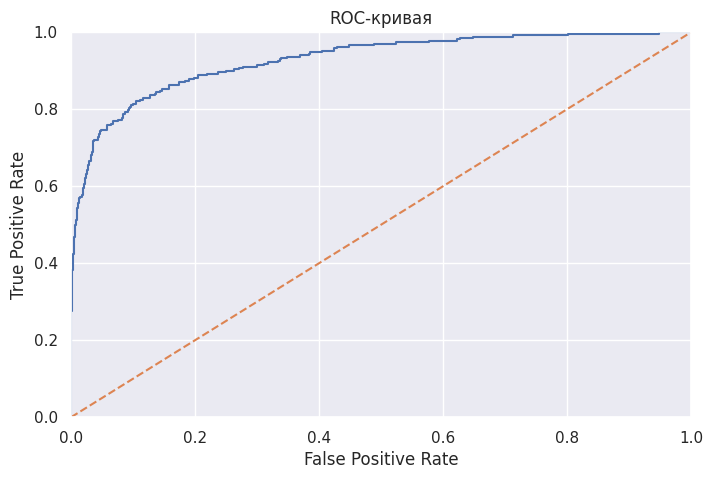


--------------------------------------
CPU times: user 16.1 s, sys: 2.24 s, total: 18.3 s
Wall time: 11.5 s


Text(0.5, 1.05, 'Матрица ошибок')

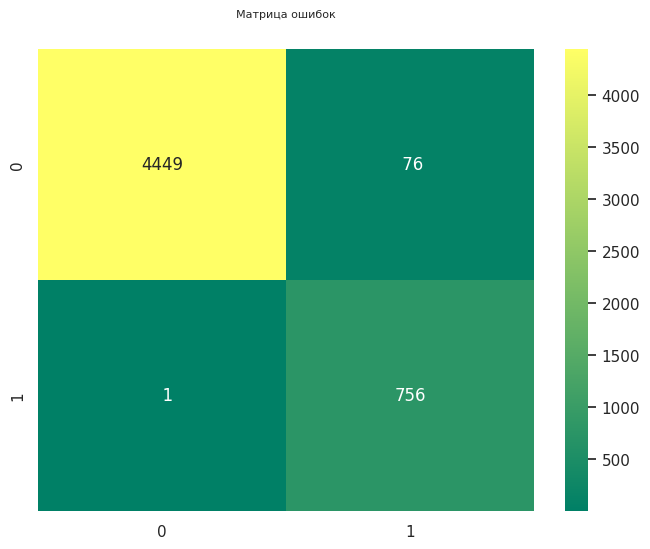

In [ ]:
%%time
start = time()

CatBoost_clf = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)
CatBoost_clf_param = {'n_estimators': [1000],
                  'learning_rate': [0.1],
                  'max_depth': [5],
                  'l2_leaf_reg': [3]}

CatBoost_clf_fitted = model_learning(CatBoost_clf, CatBoost_clf_param)

prediction = CatBoost_clf_fitted.predict(X_train)
print('--------------------------------------')
print('Модель предсказывает не тестовой выборке за %.2f секунд' %(time() - start))

#final_RMSE_CatBoost = mean_squared_error(y_train, prediction) ** 0.5
#print('Итоговый RMSE на тестовой выборке:', final_RMSE_CatBoost)
print('--------------------------------------')
test_scoring(CatBoost_clf_fitted)
print('')
print('--------------------------------------')

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(prediction,y_train),annot=True,fmt='3.0f',cmap="summer")
plt.title('Матрица ошибок', y=1.05, size=8);

- ROC-кривая (или кривая ошибок) изображается в осях: по горизонтали доля ложноположительных ответов (FPR), а по вертикали — доля истинно положительных ответов (TPR). Чем график выше, тем больше значение TPR и лучше качество модели.   
- Accuracy показывает как часто модель ошибается - доля правильных ответов  
- Полнота выявляет, какую долю положительных среди всех ответов выделила модель.  
- Точность определяет, как много отрицательных ответов нашла модель, пока искала положительные.

<b><font size=10>3</font></b><a name="3."></a>

[<font size="2">(к содержанию)</font>](#to_content.)


- Описание - какие пункты плана были выполены, а какие нет (поясняю почему)

Все норм, все пункты выполнил и даже больше, то что добавил можно посмотреть в плане с отметкой звездочка(*). Сам план использовал как чек-лист проекта.

- Описание - какие трудности возникали и как я с ними справился

трудностей в принципе не возникало, за исключением кодирования, т.к. начал использовать материал из курса и попался второй уже раз на этом, первый раз был  тоже в проекте в середине курса тогда то помогла тетрадка от ревьювера, второй раз на выпускном проекте и тоже тетрадь спасла, спасибо усвоил кодирование на долго. Так же закрыл пробел когда использовать и для каких моделей One-Hot Encoding и  Ordinal Encoding.

-  Какие ключевые шаги в решении задачи выделял

    - загрузка данных и библиотек
    - предобработка данных
    - объединение данных
    - кодирование
    - выбор модели
    - подбор гиперпараметров
    - определение лучшей модели по метрикам
    - применение результата выше перечисленного к тестовой выборке

- Какая итоговая модель, какие у нее гиперпараметры и какое качество

  Итоговая модель  CatBoostClassifier (после подбора гиперпараметров):
    
    - Метрики которые получил при обучении:

        - Accuracy Score 0.9854221885649376
        - AUC_ROC        0.9542145635263612
        - Confusion Matrix
            [[4449 76]
            [ 1 756]]

    - Метрики которые получил на тесте c гиперпараметрами модели: `{'l2_leaf_reg': 3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}`:

        - AUC_ROC        0.928
        - Confusion Matrix
            [[4449 76]
            [ 1 756]]

Время работы модели 11 сек.

#### Консолидированный отчет:
        













In [ ]:
Лучшая оценка на валидации:  0.9136443863699985
Лучшие гиперпараметры модели на валидации:  {'l2_leaf_reg': 3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}
Лучшая модель:  <catboost.core.CatBoostClassifier object at 0x7f130a0c0b50>
--------------------------------------
Accuracy train: 0.9854221885649376
AUC-ROC train:  0.9542145635263612
Confusion Metrix:
 [[4449   76]
 [   1  756]]
--------------------------------------
Модель предсказывает не тестовой выборке за 11.07 секунд
--------------------------------------
AUC-ROC test:  0.928
--------------------------------------

- список признаков, используемых для обучения лучшей модели

    * `Type` - Тип договора (ежемесячный,годовой и т.д.)
    * `PaperlessBilling` - факт выставления счета на эл. почту
    * `PaymentMethod` - способы оплаты
    * `MonthlyCharges` - ежемесячные траты на услуги
    * `TotalCharges` - всего потрачено денег  
    * `duration_in_days` - разница в днях между BeginDate и EndDate   
    * `gender` - пол клиента   
    * `SeniorCitizen`- признак представителя старшего поколения    
    * `Partner` - пожилой человек или нет
    * `Dependents` - работящий или нет
    * `InternetService` - варианты подключения интернет-соединения
    * `OnlineSecurity` - Услуга блокировки небезопасных сайтов
    * `OnlineBackup` - Услуга Облачного хранилища файлов
    * `DeviceProtection` - Наличие услуги антивируса
    * `TechSupport` - Услуга Выделенной линии технической поддержки
    * `StreamingTV` - Услуга стримингового телевидения
    * `StreamingMovies` - Услуга каталога фильмов
    * `MultipleLines` - Мультиканальная линия или нет (в данном случае отдельно услуга телефона связи или вместе с интернетом)

1. После обработки дат ввел новый признак `duration_in_days` - разница в днях между BeginDate и EndDate
2. Удалил бесполезные признаки ['customerID', 'BeginDate', 'EndDate']
3. Порядковым кодированием (Ordinal Encoding) закодировал категориальные признаки: 'Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'], т.е. перевел их в цифры


       

### Выводы :
1 - `XGBClassifier`, `LGBMClassifier`   уступают по  метрикам качества (Accuracy, AUC-ROC)
2 - Лучшая модель по времени выполнения и метрики заданной на данном проекте AUC-ROC - `CatBoost`

3 - Большинство моделей определило следующие признаки наиболее значимыми:

     - MonthlyCharges
     - duration_in_days
     - TotalCharges

### Общий вывод:

1. Машинное обучение позволяет видеть метрики вероятности ухода клиента и наиболее выжные признаки, т.е. то на что стоит обратить внимание.  
2. Обученная модель (AUC-ROC test:  0.928) полностью справляется с поставленной заказчиком задачи (AUC-ROC >= 0.85)